In [38]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# League Wrapped: Your League of Legends Season in Review
By Ian Lum and Mo Ampane

## Introduction

Online games are plagued by toxicity. Many try to use gaming as a form of escape and entertainment but are unfortunately met by a barrage of insults, from a harasser who sits miles away in their room, protected by the barrier of the internet. The game “League of Legends” has one of the most notoriously toxic communities, which has driven many gamers to avoid the volatility of playing with random teammates and only play with their friends who they can trust—myself included. However, even people that you may consider friends can still exhibit extremely toxic behavior when gaming.


Toxicity is often targeted towards those who appear to be playing poorly, with no regard for external context. The slang term, “diff,” short for “difference” has even been coined by the League of Legends community in order to harass these underperformers, used to indicate a lower level of skill of the underperformer when compared to their respective opponent. Our project strives to be a stepping stone in the path of lessening toxicity by showing a player their worst statistics in order to tell the story that everyone sucks sometimes.


## Setup

In order to run the code below, you will need to compelte the following steps

Creating an API key
1. Sign in at the [Riot Developer Website](https://developer.riotgames.com/)
2. Generate/Regenerate an API key
3. Create a file called `key.txt` in the root directory
4. Copy the API key into the first line of `key.txt`

Run the following line in the command prompt to install `riotwatcher`
> pip install riotwatcher

## Methodology

We collected our data through the API of Riot Games, the developer of League of Legends. The League of Legends API works through creating a `LolWatcher` object, which the function `create_watcher` does.

In [39]:
from modules.scraper import create_watcher
watcher = create_watcher()

Next, `get_season_matchlist` creates a list of **match ids** for all matches that a given **summoner** played during **season 12**.
- Match ids are strings that corresond to a certain match in the API. 
- Summoners are what League of Legends refers to players as
- Season 12 refers to the period of time between 1/07/2022 and 11/14/2022. League of Legends splits the game into "seasons", with each "season" lasting just under a year, with the remaining time in the year being the "preseason"

Ian's summoner name, Among Us Jimin, will be used the examples below. Additionally, the game is split into various world regions, in this case the region that Ian plays in is North America, denoted `na1`.

In [40]:
from modules.scraper import get_season_matchlist
SUMMONER_NAME = 'Among Us Jimin'
REGION = 'na1'
matchlist = get_season_matchlist(watcher, SUMMONER_NAME, REGION)
print(f"Ian played {len(matchlist)} matches in season 12")
print(f"An example of a match id is {matchlist[0]}")

Ian played 407 matches in season 12
An example of a match id is NA1_4491860733


Finally, `matchlist` is passed into `get_data_from_matchlist`. This function collects statistics for the given summoner in each match of the matchlist and compiles it into DataFrame. This DataFrame is saved to the file `data/[summoner_name].csv`.

The function takes about 2 minutes per 100 matches, due to the rate limiting of the API. Because of this, the function below is commented out so it doesn't run when "Run All" is clicked. If you wish to see the function run, feel free to uncomment and execute the cell below.

In [41]:
# from scraper import get_data_from_matchlist
# ian_data = get_data_from_matchlist(watcher, SUMMONER_NAME, matchlist, REGION)

Instead, you can load the pre-scraped data using the cell below.

In [42]:
import pandas as pd
ian_data = pd.read_csv('data/Among Us Jimin.csv', index_col=0)

To get a sense of the data, the head of the data is displayed below.

In [43]:
ian_data.head()

,allInPings,assistMePings,assists,baitPings,baronKills,basicPings,bountyLevel,challenges,champExperience,champLevel,...,turretKills,turretTakedowns,turretsLost,unrealKills,visionClearedPings,visionScore,visionWardsBoughtInGame,wardsKilled,wardsPlaced,win
NA1_4491860733,0.0,0.0,14,0.0,0,14.0,0,"{'12AssistStreakCount': 0, 'abilityUses': 338,...",15444,16,...,0,1,9,0,0.0,103,9,8,53,False
NA1_4491823727,0.0,0.0,9,0.0,0,12.0,0,"{'12AssistStreakCount': 0, 'abilityUses': 174,...",9336,12,...,0,0,10,0,0.0,68,5,6,35,False
NA1_4490062183,0.0,0.0,16,0.0,0,7.0,0,"{'12AssistStreakCount': 0, 'abilityUses': 253,...",16796,17,...,0,0,11,0,0.0,60,4,2,32,False
NA1_4487436317,0.0,0.0,35,0.0,0,23.0,0,"{'12AssistStreakCount': 2, 'abilityUses': 235,...",14112,15,...,0,5,7,0,0.0,68,4,1,25,True
NA1_4487390868,0.0,0.0,12,0.0,0,11.0,0,"{'12AssistStreakCount': 1, 'abilityUses': 295,...",11928,14,...,1,2,10,0,0.0,86,7,11,35,False


The data was then analyzed to calculate 5 aggregate statistics: The 5 **champions** with the worst **KDA**, the 5 **champions** with the worst **winrate**, the game with the most deaths and the **champion** that was played, the game with the worst **cs/m** and the **champion** that was played, and the game with the worst **vision score** per minute and the **champion** that was played.

Vocabulary:
- Champion: Playable characters
- KDA: Short for kill death assist ratio a ratio that is calculated by (kills + assists)/deaths
- winrate: Percentage of games won, wins/games played
- cs/m: Short for creep score per minute, an integral part of League of Legends, a higher creep score means you were better at collecting gold, which makes your character more powerful
- vision score: Another integral part of League of Legends, you are able to scout for enemies by gaining vision, and the efficacy of your vision collection is tracked through vision score

In [44]:
from modules.analysis import worst_kda
print("The champions that Ian had the worst KDA with were:")
worst_kda(ian_data)

The champions that Ian had the worst KDA with were:


[{'champ': 'Olaf', 'kda': 0.16666666666666666, 'games_played': 1},
 {'champ': 'Nilah', 'kda': 0.7142857142857143, 'games_played': 1},
 {'champ': 'Garen', 'kda': 0.8181818181818182, 'games_played': 2},
 {'champ': 'Nasus', 'kda': 1.0, 'games_played': 1},
 {'champ': 'Viego', 'kda': 1.125, 'games_played': 1}]

In [45]:
from modules.analysis import worst_winrate
print("The champions that Ian had the worst winrate with were:")
worst_winrate(ian_data)

The champions that Ian had the worst winrate with were:


[{'champ': 'Zilean', 'winrate': 0.0, 'games_played': 7},
 {'champ': 'Evelynn', 'winrate': 0.16666666666666666, 'games_played': 6},
 {'champ': 'Seraphine', 'winrate': 0.2857142857142857, 'games_played': 7},
 {'champ': 'Kaisa', 'winrate': 0.3, 'games_played': 10},
 {'champ': 'Quinn', 'winrate': 0.3333333333333333, 'games_played': 6}]

In [46]:
from modules.analysis import most_deaths
(deaths, champ) = most_deaths(ian_data)
print(f"The most deaths Ian had in one game was {deaths}, while playing {champ}")

The most deaths Ian had in one game was 13, while playing Ashe


In [47]:
from modules.analysis import least_cs
(cs, champ) = least_cs(ian_data)
print(f"The cs/m Ian had in one game was {round(cs,2)}, while playing {champ}")

The cs/m Ian had in one game was 2.94, while playing Janna


In [48]:
from modules.analysis import worst_vs
(vision, champ) = worst_vs(ian_data)
print(f"The vision score per minute Ian had in one game was {round(vision,2)}, while playing {champ}")

The vision score per minute Ian had in one game was 0.06, while playing Karma


## Results

After calculating the five aggregate statistics for a specific player, the stats are then visualized in a spotify wrapped like ui. This is done by typing in the player's user name, pasting in an API key, and selecting the player's region from a drop down menu.

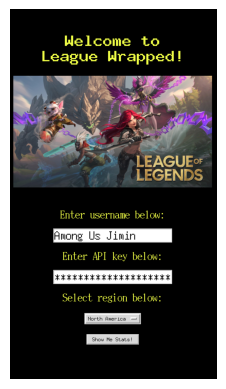

In [49]:
from modules.ui import show_image
show_image("assets/Among_Us_Jimin_initial.png")


After clicking the "Show Me Stats!" button, the user is taken to a loading screen. This loading screen clarifies the user's inputs, username and region, and provides an estimated wait time for the necessary data scraping. Clicking "Show Me Stats!" again starts the data scraping.

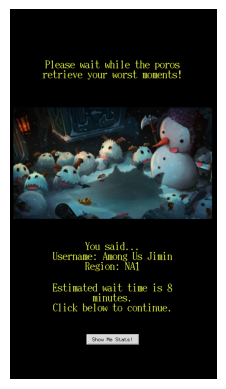

In [50]:
from modules.ui import show_image
show_image("assets/Among_Us_Jimin_loading.png")

Once the data scraping is done, the user is taken to a screen visualizing the champ they have gotten the most deaths on in one game and the number of deaths.

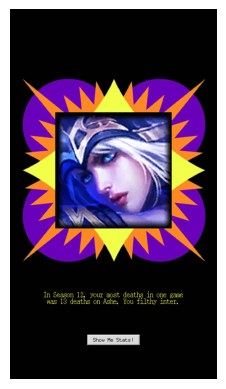

In [51]:
from modules.ui import show_image
show_image("assets/Among_Us_Jimin_deaths.png")

Clicking the "Show Me Stats!" button takes the user to visualizations of their worst KDAs, cs/m, winrates, and vision score in that order. Clicking the button again on the last visualization loops back to the visualization of most deaths. 

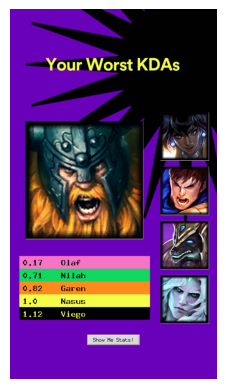

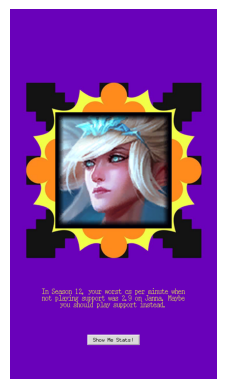

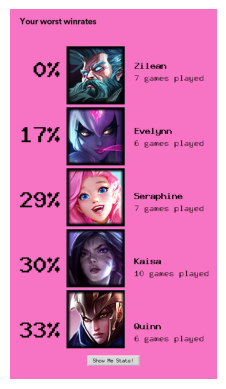

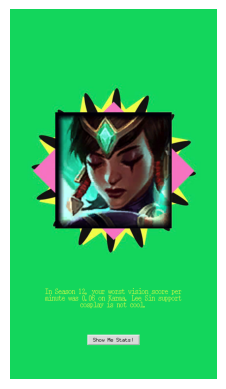

In [52]:
from modules.ui import show_image
show_image("assets/Among_Us_Jimin_kda.png")
show_image("assets/Among_Us_Jimin_farm.png")
show_image("assets/Among_Us_Jimin_winrate.png")
show_image("assets/Among_Us_Jimin_vision.png")

By revealing a player's lowlights, the player is reminded that **everyone** sucks **sometimes**. Resulting in **less** overall toxicity and a more **positive** game environment.

## Conclusion

League Wrapped shows that everyone has their flaws. One ethical implication of our work is that it could be twisted to insult others. However, people insult each other whether or not they have statistics to back them up. The positive affect of showing that everyone has their lows outweighs the possible negative uses.

Throughout the project we learned alot about coworking on a software project. Whether it was using atomic commits for the first time, structuring our repository, or documenting our work in an understandable way, we learned how to cowork more effectively using Github and other methods. We also learned how to use Tkinter to visualize our data. Specifically, implementing the data analysis in real time with the GUI and inserting multiple images pulled from URLs was very challenging. Additionally, cleaning up the code for Pylint was frustrating since overlength lines of code was the primary problem. However, these lines were URLs or text for the GUI, lines that could not be shortened without either making the URL unacessible or messing up the formatting in the GUI.

If we had more time, we would extend our project by adding visualizations of other statistics, such as worst gold, amount of money spent on skins, longest loss streak, and more. We could also improve the GUI by implementing animations and music.

Ultimately, League Wrapped serves as a reminder that no one is perfect and we should embrace it.


## League Wrapped

If you would like to try the GUI yourself, generate/regenerate a Riot API key, uncomment the code below, run it, enter your username, API key, and region, and enjoy your lowlights!

In [53]:
# from modules.ui import LeagueWrappedUI
# LeagueWrappedUI()